# Sales Data Analysis

This notebook performs the following tasks:
1. Data Inspection and Cleaning
2. Data Transformation and Filtering
3. Data Aggregation and Insights

## 1. Data Inspection and Cleaning



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Set display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)



try:
    df = pd.read_csv('Sales_Data.csv')
    # Display the first 5 rows to understand the structure
    print("First 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("File not found. Please check the file path.")


First 5 rows of the dataset:
  Transaction_ID Customer_ID        Date     Product  Quantity  Price_per_Unit  Total_Amount Payment_Method         City
0          T1000        C106   7/11/2022    Keyboard       3.0          1500.0        4500.0            NaN  Los Angeles
1          T1001        C169   26/5/2021  Headphones       3.0           500.0        1500.0         Online      Houston
2          T1002        C172  13/11/2023    Keyboard       NaN           500.0           NaN         Online      Phoenix
3          T1003        C184   4/12/2023       Mouse       NaN          1500.0           NaN           Cash      Houston
4          T1004        C157    6/9/2023  Smartphone       3.0          1000.0        3000.0            NaN  Los Angeles


In [ ]:
# Checking basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Checking for duplicate transactions
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

Dataset Shape: (50, 9)

Data Types:
Transaction_ID     object
Customer_ID        object
Date               object
Product            object
Quantity          float64
Price_per_Unit    float64
Total_Amount      float64
Payment_Method     object
City               object
dtype: object

Missing Values:
Transaction_ID     0
Customer_ID        0
Date               0
Product            0
Quantity           9
Price_per_Unit    10
Total_Amount      17
Payment_Method     9
City              10
dtype: int64

Number of Duplicate Rows: 0


In [18]:
# Handle missing values (if any)
# For numeric columns, fill with median
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
        print(f"Filled missing values in {col} with median")

# For categorical columns, fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"Filled missing values in {col} with mode")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

Filled missing values in Quantity with median
Filled missing values in Price_per_Unit with median
Filled missing values in Total_Amount with median
Filled missing values in Payment_Method with mode
Filled missing values in City with mode


In [19]:
# Convert Date column to proper datetime format
try:
    # Convert using the specific DD/MM/YYYY format
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    print("Date column converted to datetime format successfully using DD/MM/YYYY format")
    
    # Display a sample of converted dates to verify
    print("\nSample of converted dates:")
    print(df[['Date']].head())
except Exception as e:
    print(f"Error converting Date column: {e}")
    # Try alternative formats if the specific format fails
    try:
        # Try automatic format detection
        df['Date'] = pd.to_datetime(df['Date'])
        print("Date column converted using automatic format detection")
    except:
        print("Could not convert Date column")

Date column converted to datetime format successfully using DD/MM/YYYY format

Sample of converted dates:
        Date
0 2022-11-07
1 2021-05-26
2 2023-11-13
3 2023-12-04
4 2023-09-06


In [20]:
# Ensure Total_Amount is correctly calculated as Quantity × Price_per_Unit
# First, check if Total_Amount already exists and if it matches the calculation
if 'Total_Amount' in df.columns:
    # Calculate the expected Total_Amount
    expected_total = df['Quantity'] * df['Price_per_Unit']
    
    # Check if there are mismatches between calculated and existing values
    mismatches = (df['Total_Amount'] != expected_total).sum()
    
    if mismatches > 0:
        print(f"Found {mismatches} mismatches in Total_Amount calculation")
        df['Total_Amount'] = expected_total
        print("Total_Amount column has been recalculated")
else:
    # If Total_Amount column doesn't exist, create it
    df['Total_Amount'] = df['Quantity'] * df['Price_per_Unit']
    print("Created Total_Amount column as Quantity × Price_per_Unit")

# Display the updated first few rows
print("\nUpdated data with correct Total_Amount:")
print(df.head())

Found 16 mismatches in Total_Amount calculation
Total_Amount column has been recalculated

Updated data with correct Total_Amount:
  Transaction_ID Customer_ID       Date     Product  Quantity  Price_per_Unit  Total_Amount Payment_Method         City
0          T1000        C106 2022-11-07    Keyboard       3.0          1500.0        4500.0         Online  Los Angeles
1          T1001        C169 2021-05-26  Headphones       3.0           500.0        1500.0         Online      Houston
2          T1002        C172 2023-11-13    Keyboard       3.0           500.0        1500.0         Online      Phoenix
3          T1003        C184 2023-12-04       Mouse       3.0          1500.0        4500.0           Cash      Houston
4          T1004        C157 2023-09-06  Smartphone       3.0          1000.0        3000.0         Online  Los Angeles


## 2. Data Transformation and Filtering

Let's extract additional features from our data and filter transactions based on specific criteria.

In [ ]:
# Extracting month and year from the Date column and create new columns
df['Transaction_Month'] = df['Date'].dt.month
df['Transaction_Year'] = df['Date'].dt.year
df['Transaction_Month_Name'] = df['Date'].dt.month_name()

# Displaying the first few rows with the new columns
print("Data with extracted date components:")
print(df[['Transaction_ID', 'Date', 'Transaction_Month', 'Transaction_Year', 'Transaction_Month_Name']].head())

Data with extracted date components:
  Transaction_ID       Date  Transaction_Month  Transaction_Year Transaction_Month_Name
0          T1000 2022-11-07                 11              2022               November
1          T1001 2021-05-26                  5              2021                    May
2          T1002 2023-11-13                 11              2023               November
3          T1003 2023-12-04                 12              2023               December
4          T1004 2023-09-06                  9              2023              September


Filter 1: Number of transactions with more than 2 units: 32

Sample of high quantity transactions:
  Transaction_ID Customer_ID       Date     Product  Quantity  Price_per_Unit  Total_Amount Payment_Method         City  Transaction_Month  Transaction_Year Transaction_Month_Name
0          T1000        C106 2022-11-07    Keyboard       3.0          1500.0        4500.0         Online  Los Angeles                 11              2022               November
1          T1001        C169 2021-05-26  Headphones       3.0           500.0        1500.0         Online      Houston                  5              2021                    May
2          T1002        C172 2023-11-13    Keyboard       3.0           500.0        1500.0         Online      Phoenix                 11              2023               November
3          T1003        C184 2023-12-04       Mouse       3.0          1500.0        4500.0           Cash      Houston                 12              2023               December
4

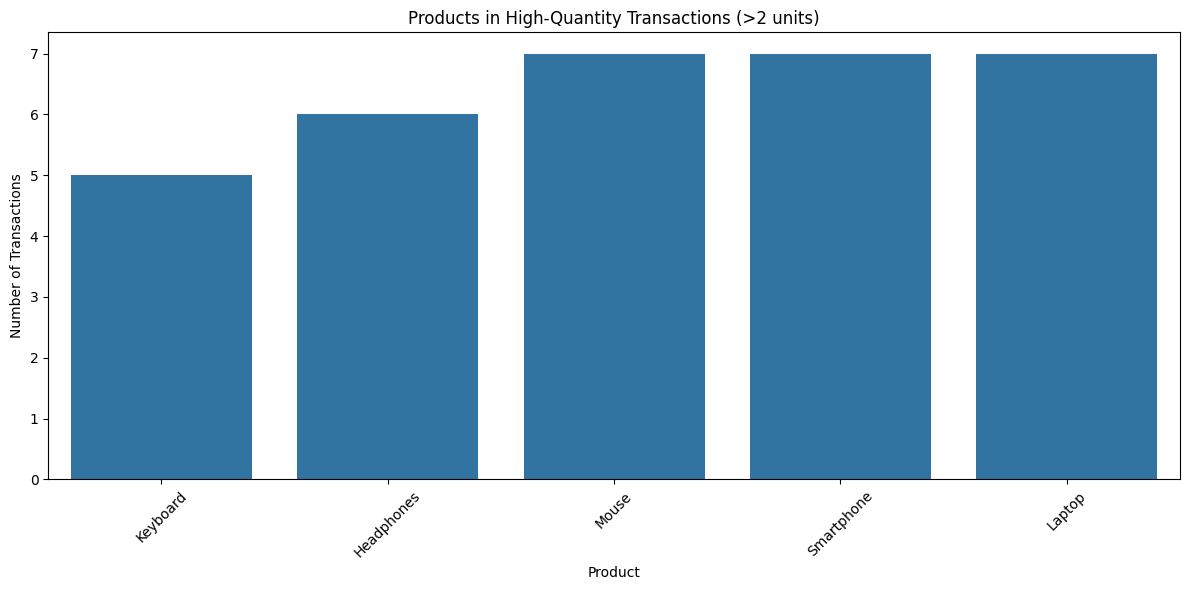

In [22]:
# FILTER 1: Transactions where customers bought more than 2 units of a product
high_quantity_transactions = df[df['Quantity'] > 2]

print(f"Filter 1: Number of transactions with more than 2 units: {len(high_quantity_transactions)}")
print("\nSample of high quantity transactions:")
print(high_quantity_transactions.head())

# Visualize distribution of products in high-quantity transactions
plt.figure(figsize=(12, 6))
sns.countplot(data=high_quantity_transactions, x='Product')
plt.title('Products in High-Quantity Transactions (>2 units)')
plt.xlabel('Product')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Filter 2: Number of transactions with total amount > $500: 50

Sample of high-value transactions:
  Transaction_ID Customer_ID       Date     Product  Quantity  Price_per_Unit  Total_Amount Payment_Method         City  Transaction_Month  Transaction_Year Transaction_Month_Name
0          T1000        C106 2022-11-07    Keyboard       3.0          1500.0        4500.0         Online  Los Angeles                 11              2022               November
1          T1001        C169 2021-05-26  Headphones       3.0           500.0        1500.0         Online      Houston                  5              2021                    May
2          T1002        C172 2023-11-13    Keyboard       3.0           500.0        1500.0         Online      Phoenix                 11              2023               November
3          T1003        C184 2023-12-04       Mouse       3.0          1500.0        4500.0           Cash      Houston                 12              2023               December
4 

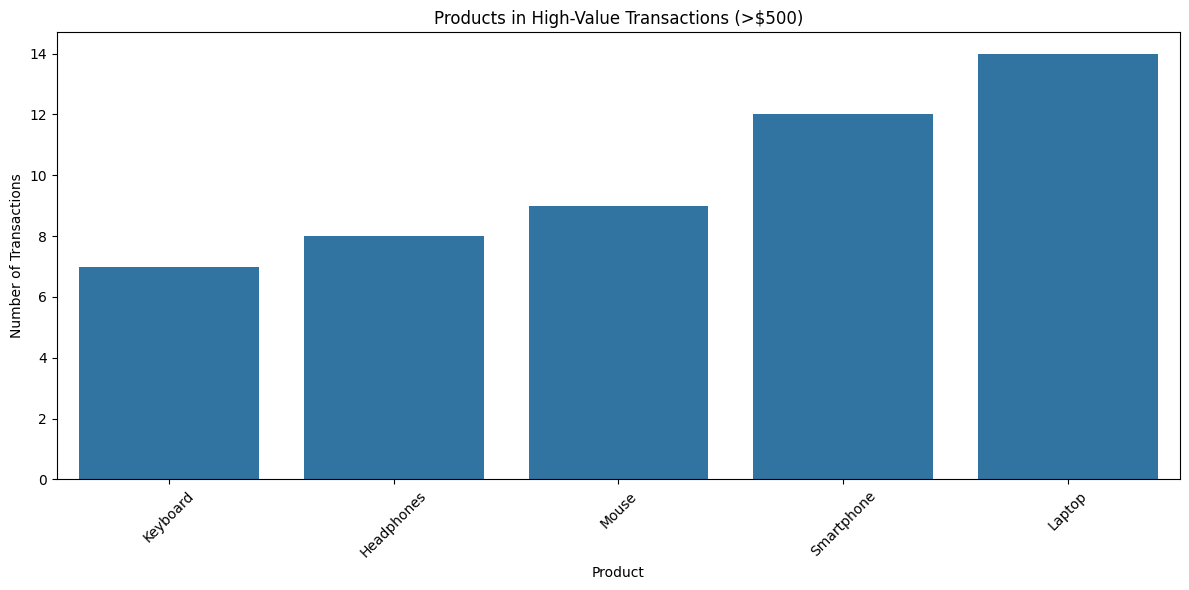

In [24]:
# FILTER 2: Transactions with total transaction amount greater than $500
high_value_transactions = df[df['Total_Amount'] > 500]

print(f"Filter 2: Number of transactions with total amount > $500: {len(high_value_transactions)}")
print("\nSample of high-value transactions:")
print(high_value_transactions.head())

# Visualize distribution of products in high-value transactions
plt.figure(figsize=(12, 6))
sns.countplot(data=high_value_transactions, x='Product')
plt.title('Products in High-Value Transactions (>$500)')
plt.xlabel('Product')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 3. Data Aggregation and Insights

Now let's aggregate our data to extract meaningful business insights.

Available columns in the dataframe: ['Transaction_ID', 'Customer_ID', 'Date', 'Product', 'Quantity', 'Price_per_Unit', 'Total_Amount', 'Payment_Method', 'City', 'Transaction_Month', 'Transaction_Year', 'Transaction_Month_Name']
Using 'Product' for product identification

Top 5 most purchased products by quantity:


,Product,Total_Quantity_Purchased
0,Laptop,32.0
1,Smartphone,30.0
2,Mouse,23.0
3,Headphones,21.0
4,Keyboard,18.0


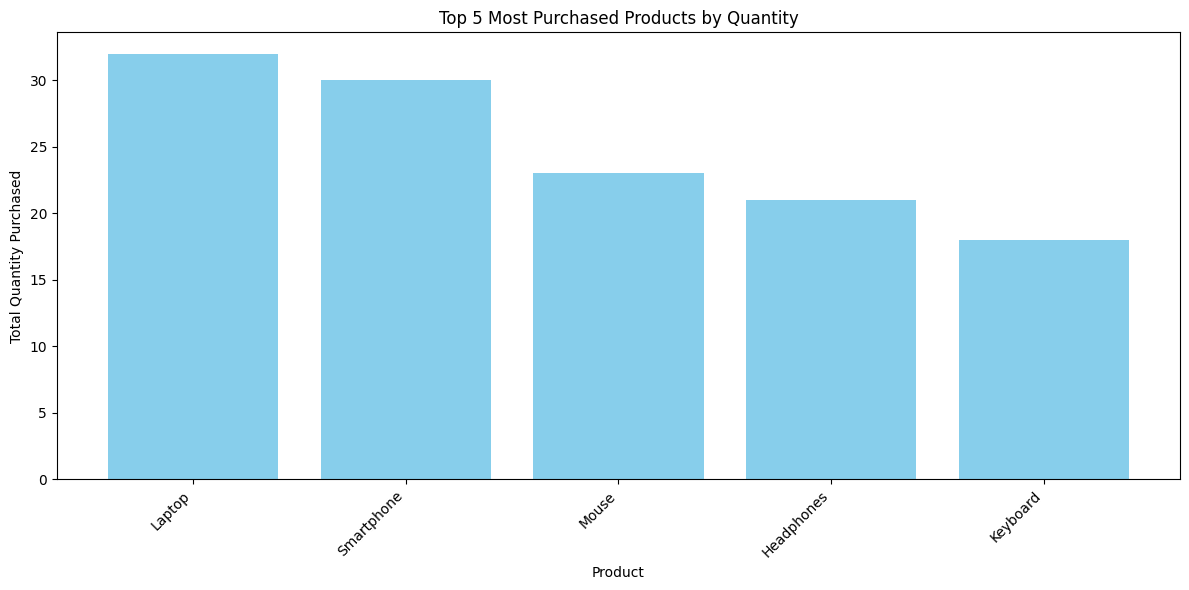

In [26]:
# Find the top 5 most purchased products by quantity
# Check which columns actually exist in the dataframe
print(f"Available columns in the dataframe: {df.columns.tolist()}")

# Use the correct column name for products
if 'Product' in df.columns:
    product_column = 'Product'
    print(f"Using '{product_column}' for product identification")
elif 'Product_ID' in df.columns:
    product_column = 'Product_ID'
    print(f"Using '{product_column}' for product identification")
elif 'Product_Name' in df.columns:
    product_column = 'Product_Name'
    print(f"Using '{product_column}' for product identification")
else:
    raise ValueError("No product column found in the dataset")

# Group by the product column and sum the quantities
top_products = df.groupby(product_column)['Quantity'].sum().sort_values(ascending=False).reset_index()
top_products.columns = [product_column, 'Total_Quantity_Purchased']

print("\nTop 5 most purchased products by quantity:")
display(top_products.head(5))

# Visualize the top 5 products
plt.figure(figsize=(12, 6))
top_5_products = top_products.head(5)
plt.bar(top_5_products[product_column], top_5_products['Total_Quantity_Purchased'], color='skyblue')
plt.title('Top 5 Most Purchased Products by Quantity')
plt.xlabel('Product')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Revenue generated from each city:


,City,Total_Revenue
0,Houston,76000.0
1,New York,28000.0
2,Los Angeles,24500.0
3,Phoenix,22500.0
4,Chicago,16500.0


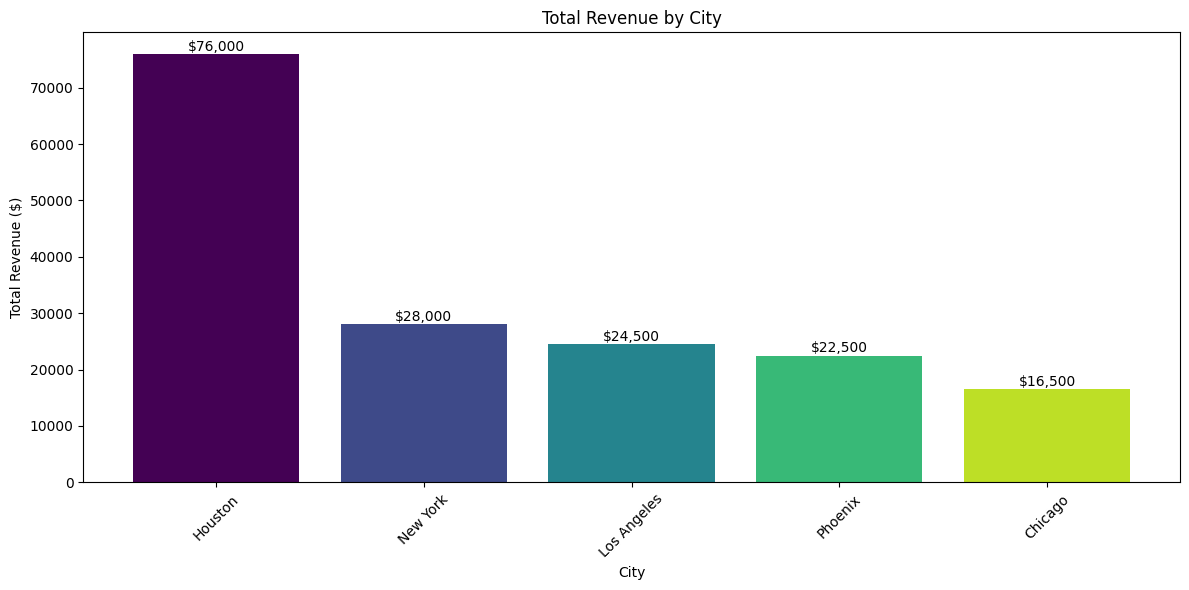

In [28]:
# Calculate the total revenue generated from each city
if 'City' in df.columns:
    city_revenue = df.groupby('City')['Total_Amount'].sum().sort_values(ascending=False).reset_index()
    city_revenue.columns = ['City', 'Total_Revenue']

    print("Revenue generated from each city:")
    display(city_revenue)

    # Visualize the revenue by city using Matplotlib instead of Plotly
    plt.figure(figsize=(12, 6))
    colors = plt.cm.viridis(np.linspace(0, 0.9, len(city_revenue)))
    bars = plt.bar(city_revenue['City'], city_revenue['Total_Revenue'], color=colors)
    plt.title('Total Revenue by City')
    plt.xlabel('City')
    plt.ylabel('Total Revenue ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Add data labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'${height:,.0f}', ha='center', va='bottom', rotation=0)
    
    plt.show()
else:
    print("City information not available in the dataset")